# Assignment – 771766 Fundamentals of Data Science PROJECT

# Census 20 Data Cleaning

The field records are as follows

1. Street Number (this is set to “1” if it is a unique dwelling);
2. Street Name;
3. First Name of occupant;
4. Surname of occupant;
5. Age of occupant;
6. Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply
the person who had the responsibility to fill in the census details);
7. Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors);
8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
9. Occupation (this field was implemented in a modern style, rather than typical 1881 occupations);
10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
11. Religion (we have implemented a set of real-world religions).

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("census20.csv")

df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Turkey Gardens,Alexander,Macdonald,21.0,Head,Married,Male,Sports development officer,None,None
1,1,Turkey Gardens,Yvonne,Macdonald,19.0,Wife,Married,Female,University Student,None,None
2,2,Turkey Gardens,Louise,Taylor,38.0,Head,Divorced,Female,Mining engineer,None,Christian
3,2,Turkey Gardens,Philip,Harding,55.0,Visitor,Single,Male,Quarry manager,None,Christian
4,3,Turkey Gardens,Rachael,Evans,78.0,Head,Widowed,Female,Retired Freight forwarder,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8572,1,Lomond Manor,Rita,Newman,40.0,Head,Divorced,Female,Advertising copywriter,None,Methodist
8573,1,Lomond Manor,Vincent,Newman,9.0,Son,NaN,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8.0,Daughter,NaN,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4.0,Son,NaN,Male,Child,None,NaN


To replace the space between the column names for easy access

In [3]:
df.columns = df.columns.str.replace(" ", "_")

# To Explore the Data

Checking through the few rows of the Data

In [4]:
df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Turkey Gardens,Alexander,Macdonald,21.0,Head,Married,Male,Sports development officer,None,None
1,1,Turkey Gardens,Yvonne,Macdonald,19.0,Wife,Married,Female,University Student,None,None
2,2,Turkey Gardens,Louise,Taylor,38.0,Head,Divorced,Female,Mining engineer,None,Christian
3,2,Turkey Gardens,Philip,Harding,55.0,Visitor,Single,Male,Quarry manager,None,Christian
4,3,Turkey Gardens,Rachael,Evans,78.0,Head,Widowed,Female,Retired Freight forwarder,None,Christian


In [5]:
df.tail()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
8572,1,Lomond Manor,Rita,Newman,40.0,Head,Divorced,Female,Advertising copywriter,None,Methodist
8573,1,Lomond Manor,Vincent,Newman,9.0,Son,NaN,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8.0,Daughter,NaN,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4.0,Son,NaN,Male,Child,None,NaN
8576,1,Lomond Manor,Kim,Butler-Newman,1.0,Daughter,NaN,Female,Child,None,NaN


In [6]:
#To check the random sample of the Data
df.sample(8)

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1274,13,Singh Forge,Bethan,Miller,42.0,Head,Married,Female,Location manager,None,Methodist
6995,44,Lancelot Summit,Martin,Adams,77.0,Head,Widowed,Male,Retired Civil Service administrator,None,None
7600,35,Windy Skyway,Carl,Wells,56.0,Husband,Married,Male,Unemployed,None,None
151,56,Turkey Gardens,Rita,Booth,33.0,Head,Divorced,Female,Community education officer,None,Christian
4025,20,Stoke Harbors,Dean,Morrison,4.0,Son,NaN,Male,Child,None,NaN
396,9,Dunn Spur,Terence,Fitzgerald,45.0,Head,Single,Male,TEFL teacher,None,None
6054,12,Young Drive,Molly,Bond,66.0,Head,Married,Female,Podiatrist,None,Christian
1764,4,Haymarketbond Road,Sandra,Smith,29.0,Head,Married,Female,"Therapist, speech and language",None,None


In [7]:
#To check the columns of the Data
df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [8]:
#Dimension of the Data
df.shape

(8577, 11)

- It shows that the census20 data contains 11 columns and 8577 rows

In [9]:
# To check the data types of each columns in the data
df.dtypes

House_Number                       int64
Street                            object
First_Name                        object
Surname                           object
Age                              float64
Relationship_to_Head_of_House     object
Marital_Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House_Number                   8577 non-null   int64  
 1   Street                         8577 non-null   object 
 2   First_Name                     8577 non-null   object 
 3   Surname                        8577 non-null   object 
 4   Age                            8577 non-null   float64
 5   Relationship_to_Head_of_House  8577 non-null   object 
 6   Marital_Status                 6492 non-null   object 
 7   Gender                         8577 non-null   object 
 8   Occupation                     8577 non-null   object 
 9   Infirmity                      8577 non-null   object 
 10  Religion                       6445 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 737.2+ KB


- From the data info 
- We have 8577 entries
- We have 9 columns with object data types
- Age column with float data type
- House number column contain integer data type

- Also two columns are having NaN values

- The columns with missing values are Marital_Status and Religion

In [11]:
#To check for the NaN values
df.isnull().sum()

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   2085
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2132
dtype: int64

- There are 2085 citizens in which there Marital status is missing

- There are 2132 citizens in which information about there Religion is missing

In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
House_Number,8577.0,NaN,NaN,NaN,37.082896,44.790872,1.0,9.0,21.0,42.0,220.0
Street,8577,104,Faith Street,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First_Name,8577,364,Anna,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,8577,673,Smith,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8577.0,NaN,NaN,NaN,35.594086,21.377013,0.0,18.0,35.0,50.0,107.0
Relationship_to_Head_of_House,8577,22,Head,2991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,6492,4,Single,2831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8577,2,Female,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,8577,1070,Student,1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infirmity,8577,8,None,8496,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- from the data

- The most common street or the street that most of the citizens stays is the Faith Street

- More of the citizens bear Anna as there first name
- More of the citizens bear Smith as there surname
- More of the citizens are single
- More of the citizens are head of the house
- More of the citizens are Female
- More of the citizens are student
- More of the citizens have none religion
- More of the citizens have none infirmity

In [13]:
#To check for dublicate in the data
df.duplicated().sum()

0

#### Checking for unique values all through the column

In [14]:
df['House_Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [15]:
df['Street'].unique()

array(['Turkey Gardens', 'Howarth Drive', 'Knight Greens', 'Ahmed Haven',
       'Summer Crescent', 'Dunn Spur', 'Barlow Pike', 'Charlton Avenue',
       'Steele Falls', 'Marsh Road', 'Aberdeen Knolls', 'Column Avenue',
       'Singh Forge', 'Polaris Crescent', 'Chemist Port', 'Webster Drive',
       'Wilson Forge', 'Haymarketbond Road', 'Chapman Trace',
       'Rosetap Road', 'Knight Corner', 'Silverpush Crescent',
       'Wilson Views', 'Faith Street', 'Clearwater Road', 'Allen Drive',
       'Parrot Crescent', 'Unitedpack Lane', 'Obelisk Orchard',
       'George Drive', 'Harvey Dale', 'Francis Field', 'Hughes Road',
       'Wales Crescent', 'Corporation Road', 'Edwards Points',
       'Stoke Harbors', 'Dundee Pass', 'Stationloom Street',
       'Coconut Keys', 'James Rapid', 'Goldfinch Avenue',
       'Aethelstan Pass', 'Penny Square', 'May Road', 'Ryan Greens',
       'Smith Divide', 'Wright Road', 'Unity Avenue',
       'Westminstertun Crescent', 'Cannon Groves', 'Snapdragon Drive

In [16]:
df['First_Name'].unique()

array(['Alexander', 'Yvonne', 'Louise', 'Philip', 'Rachael', 'Hugh',
       'Graham', 'Alexandra', 'Holly', 'Martyn', 'Katie', 'Maureen',
       'Lucy', 'Sean', 'Christian', 'Georgina', 'Ben', 'Jill', 'Julia',
       'Gerard', 'Hilary', 'Bryan', 'Bethan', 'Rebecca', 'Jordan',
       'Naomi', 'Louis', 'Zoe', 'Joanna', 'Damien', 'Dominic', 'Cameron',
       'Henry', 'Kerry', 'James', 'Joe', 'Katy', 'Anna', 'Vanessa',
       'Pamela', 'Martin', 'Victor', 'Terry', 'Danny', 'Neil', 'Barry',
       'Kathryn', 'Julian', 'Lesley', 'Kate', 'Dean', 'Graeme',
       'Mitchell', 'Denise', 'Geoffrey', 'Mark', 'Emily', 'Thomas',
       'Steven', 'Harriet', 'Derek', 'Kelly', 'Robin', 'Maria', 'Craig',
       'Adam', 'Suzanne', 'Judith', 'Charlie', 'Josephine', 'Justin',
       'Kimberley', 'Georgia', 'Nathan', 'Jacqueline', 'Callum',
       'Patrick', 'Sian', 'Jodie', 'Jayne', 'Amelia', 'Lee', 'Jean',
       'Sylvia', 'Vincent', 'Stanley', 'Frank', 'Richard', 'Carol',
       'Geraldine', 'Douglas', '

In [17]:
df['Surname'].unique()

array(['Macdonald', 'Taylor', 'Harding', 'Evans', 'Nicholson', 'Pearson',
       'Williams-Evans', 'Thomas', 'Gibbs', 'Schofield', 'Martin',
       'Edwards', 'Ashton', 'Bennett', 'Fraser', 'Ahmed', 'Cooper',
       'Scott', 'James', 'Jackson', 'Perry', 'Kaur', 'Coates-Kaur',
       'Goodwin', 'Hughes', 'Thompson', 'Adams', 'Griffiths', 'Spencer',
       'Young', 'Dobson', 'Parkin', 'Wade', 'Smith', 'Jones', 'Brown',
       'Murray', 'Powell', 'Wright', 'Mason', 'Flynn', 'Chamberlain',
       'Lees-Ross', 'Williams-Davies', 'West', 'Doyle', 'Tucker', 'Pope',
       'Farmer', 'Cole', 'Read', 'Johnson', 'Bates', 'Riley', 'Wilkinson',
       'Hammond', 'Green', 'Humphries', 'Gardiner', 'Price', 'Wilson',
       'Craig', "O'Connor", 'Shaw', 'Clarke', 'Holden', 'Day', 'Ross',
       'Walker', 'Booth', 'Harrison', 'Fowler', 'Power', 'Williams',
       'Harvey', 'Grant', 'Blake', 'Arnold', 'Lawrence', 'Henry',
       'Roberts', 'Clements', 'Warner', 'Hill', 'Moss', 'Rogers',
       'Burton', 

In [18]:
df['Age'].unique()

array([ 21.        ,  19.        ,  38.        ,  55.        ,
        78.        ,  39.        ,  36.        ,  34.        ,
        32.        ,   9.        ,  50.        ,  54.        ,
        18.        ,  17.        ,  44.        ,  42.        ,
        23.        ,  20.        ,   3.        ,  58.        ,
        56.        ,  94.        ,  33.        ,  40.        ,
        25.        ,  22.        ,  24.        ,  67.        ,
        63.        ,   2.        ,   1.        ,  26.        ,
        52.        ,  71.        ,  43.        ,  27.        ,
        31.        ,  11.        ,   8.        ,   4.        ,
         7.        ,  51.        ,  14.        ,  57.        ,
        29.        ,  47.        ,  64.        ,  15.        ,
        79.        ,  60.        ,  59.        ,  12.        ,
        41.        ,  48.        ,  68.        ,  37.        ,
        53.        ,  10.        ,  28.        ,  35.        ,
        13.        ,  77.        ,  46.        ,   5.  

In [19]:
df['Relationship_to_Head_of_House'].unique()

array(['Head', 'Wife', 'Visitor', 'Son', 'Daughter', 'Partner', 'Husband',
       'None', 'Lodger', 'Grandson', 'Adopted Son', 'Granddaughter',
       'Sibling', 'Step-Daughter', 'Adopted Daughter', 'Nephew',
       'Step-Son', 'Cousin', 'Neice', 'Son-in-law', ' ',
       'Adopted Granddaughter'], dtype=object)

In [20]:
df['Marital_Status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', nan], dtype=object)

In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df['Occupation'].unique()

array(['Sports development officer', 'University Student',
       'Mining engineer', ..., 'Retired Physicist, medical',
       'Retired Landscape architect', 'Retired Hospital pharmacist'],
      dtype=object)

In [23]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection',
       'Blind', 'Disabled', 'Mental Disability', ' '], dtype=object)

In [24]:
df['Religion'].unique()

array(['None', 'Christian', nan, 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Sith', 'Hindu', 'Buddist',
       'Baptist', 'Bahai', ' '], dtype=object)

# Data Cleaning

## Now treating the probelm with the features of the data

### Treating the Age column

In [25]:
df["Age"]

0       21.0
1       19.0
2       38.0
3       55.0
4       78.0
        ... 
8572    40.0
8573     9.0
8574     8.0
8575     4.0
8576     1.0
Name: Age, Length: 8577, dtype: float64

- Converting the data types of the Age from float to integer
- Note that the our data is a census data so for a census 
--- Age is usually represented by an integer, since age is  the number of years that have passed since a person was born. 
Age can only take on discrete values, so using a float would be unnecessary and potentially misleading----

In [26]:
#Converting the Age column from float to integer

df['Age'] = df['Age'].astype(int)

In [27]:
#Checking for missing values in the Age column

df['Age'].isnull().sum()

0

In [28]:
df['Age'].unique()

array([ 21,  19,  38,  55,  78,  39,  36,  34,  32,   9,  50,  54,  18,
        17,  44,  42,  23,  20,   3,  58,  56,  94,  33,  40,  25,  22,
        24,  67,  63,   2,   1,  26,  52,  71,  43,  27,  31,  11,   8,
         4,   7,  51,  14,  57,  29,  47,  64,  15,  79,  60,  59,  12,
        41,  48,  68,  37,  53,  10,  28,  35,  13,  77,  46,   5,  75,
        45,  16,  69,  74,  66,  72,  62,  30,  49,  81,   0,  70,   6,
        84,  89,  87,  82,  85,  76,  73, 100,  80,  86,  61,  65,  91,
        96,  93,  83,  98, 104,  95, 103,  88,  90,  99, 102,  92,  97,
       105, 101, 107])

### Treating the Relationship to head of house

In [29]:
#To check where the Relationship of the house is having empty rows

df[(df['Relationship_to_Head_of_House'] == " ")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5348,21,Repton Drive,Gary,Fisher,16,,NaN,Male,Student,None,NaN
8230,15,Potts Valley,Michael,Webb,18,,Divorced,Male,Student,None,None


-- The empty row in the relatioship to head of the house will be replaced with Son because the two missing rows have male has there Gender 

In [30]:
#To replace the Relationship of the house with empty rows(" ") with Son

df['Relationship_to_Head_of_House'].replace([" "],["Son"], inplace = True)

In [31]:
#Confimation check if it has been repalced

df[(df['Relationship_to_Head_of_House'] == " ")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


## Treating the Marital Status column

In [32]:
df['Marital_Status'].value_counts()

Single      2831
Married     2602
Divorced     753
Widowed      306
Name: Marital_Status, dtype: int64

In [33]:
df['Marital_Status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', nan], dtype=object)

In [34]:
#To check rows with NaN values(nan)

df[df['Marital_Status'].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,NaN,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,NaN,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,NaN,Female,Child,None,NaN
39,14,Turkey Gardens,Vanessa,Jackson,2,Daughter,NaN,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,1,Simmons Delve,Jonathan,Goodwin,0,None,NaN,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,NaN,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,NaN,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,NaN,Male,Child,None,NaN


In [35]:
#Checking the relationship between the Age and Marital Status

df[(df['Age'] <= 17) & (df['Marital_Status'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,NaN,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,NaN,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,NaN,Female,Child,None,NaN
39,14,Turkey Gardens,Vanessa,Jackson,2,Daughter,NaN,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,1,Simmons Delve,Jonathan,Goodwin,0,None,NaN,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,NaN,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,NaN,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,NaN,Male,Child,None,NaN


.... According to The Marriage and Civil Partnership (Minimum Age) Act 2022 in Uk. 
It State that the minimum age to get married is 18 years. 
So 17 years and below will be consider Minor which are not elegible to get married....

- Therefore where Age <= 17 the 'Nan' will be replaced with 'Minor' in the  Marital status

In [36]:
#To replace where Age <= 17 and Marital status = Nan with (Single)

df.loc[(df['Age'] <= 17) & (df['Marital_Status'].isnull()),:] = df.loc[(df['Age'] <= 17) & (df['Marital_Status'].isnull()),:].fillna(value = {'Marital_Status': "Minor"})


In [37]:
#Checking To show if the Marital status still having Nan values

df[df['Marital_Status'].isna()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [38]:
#To check where Ages = 18 and Marital status = Widowed

df[(df['Age'] == 18) & (df['Marital_Status'] == 'Widowed')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1308,21,Singh Forge,Gerald,Jordan,18,Son,Widowed,Male,Student,None,Catholic
3843,30,Corporation Road,Sharon,Edwards,18,Head,Widowed,Female,Student,None,NaN
6095,5,Bishop Lane,Joe,Rogers,18,Son,Widowed,Male,Student,None,None


--From the above it shows that Marital Status inputed as widowed is a lie because it is unsual for someone to be a widowed
at the age of 18 years and also having a relationship to head of house as as a son and be a widowed--

--So the widowed that are age of 18 years will be replaced with single


In [39]:
#To replace where age <= 18 and Martal Status = widowed with single

df.loc[(df['Age'] == 18) & (df['Marital_Status'] == "Widowed"), 'Marital_Status'] = df.loc[(df['Age'] == 18) & (df['Marital_Status'] == "Widowed"), 'Marital_Status'].replace("Widowed", "Single")

In [40]:
#To confirm the widowed has been replaced with Single

df[(df['Age'] <= 18) & (df['Marital_Status'] == 'Widowed')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [41]:
#To check for citizen for are Age <= 18 and Marital status = Divorced

df[(df['Age'] <= 18) & (df['Marital_Status'] == 'Divorced')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
70,25,Turkey Gardens,Adam,Wade,18,Son,Divorced,Male,Student,None,Methodist
639,5,Marsh Road,Sheila,Williams,18,Head,Divorced,Female,Student,None,NaN
1364,2,Polaris Crescent,Clive,Smith,18,Son,Divorced,Male,Student,None,None
1537,49,Polaris Crescent,Bethan,Robinson,18,Daughter,Divorced,Female,Student,None,None
3384,36,Harvey Dale,Sean,Bowen,18,Son,Divorced,Male,Student,None,None
3535,10,Hughes Road,Louis,Scott,18,Son,Divorced,Male,Student,None,None
4159,21,James Rapid,Lee,Parker,18,Head,Divorced,Male,Student,None,NaN
4607,27,Parrot Crescent,Diane,Sharp,18,Daughter,Divorced,Female,Student,None,None
4621,31,Parrot Crescent,Lesley,Schofield,18,Daughter,Divorced,Female,Student,None,Catholic
5284,11,Smith Vista,Christine,Khan,18,Step-Daughter,Divorced,Female,Student,None,Christian


In [42]:
#To check the Age between 18 and 35 who are divorced

df[(df['Age'] > 18) & (df['Age'] < 35) & (df['Marital_Status'] == 'Divorced')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
24,7,Turkey Gardens,Rachael,Gibbs,32,Daughter,Divorced,Female,Personal assistant,None,None
67,24,Turkey Gardens,Robin,Parkin,19,Son,Divorced,Male,Logistics and distribution manager,None,Christian
74,27,Turkey Gardens,Josephine,Jones,29,Head,Divorced,Female,IT trainer,None,Jewish
87,33,Turkey Gardens,Jayne,Williams-Davies,25,Head,Divorced,Female,Unemployed,None,None
99,37,Turkey Gardens,Geraldine,Farmer,34,Daughter,Divorced,Female,Historic buildings inspector/conservation officer,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,Iris Castle,Timothy,Rose,34,Sibling,Divorced,Male,Freight forwarder,None,None
8529,1,Riley Lighthouse,Edward,Chadwick,30,Son,Divorced,Male,Ambulance person,None,Christian
8531,1,Riley Lighthouse,Grace,Chadwick,25,Daughter,Divorced,Female,"Therapist, nutritional",None,None
8556,1,Norwich Bastion,Caroline,Holmes,26,Head,Divorced,Female,Unemployed,None,Methodist


In [43]:
#To check Ages between 18 and 107 which marital status = Divorced and Gender = Male


df[(df['Age'] > 18) & (df['Age'] < 107) & (df['Marital_Status'] == 'Divorced') & (df['Gender'] == 'Male')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6,3,Turkey Gardens,Graham,Evans,38,Son,Divorced,Male,"Scientist, research (medical)",None,Christian
57,21,Turkey Gardens,Philip,Bennett,78,Head,Divorced,Male,Retired Manufacturing engineer,None,Methodist
67,24,Turkey Gardens,Robin,Parkin,19,Son,Divorced,Male,Logistics and distribution manager,None,Christian
125,46,Turkey Gardens,Harry,Price,38,Head,Divorced,Male,Horticultural consultant,None,Catholic
208,3,Ahmed Haven,Trevor,Hughes,19,Son,Divorced,Male,University Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,Iris Castle,Timothy,Rose,34,Sibling,Divorced,Male,Freight forwarder,None,None
8520,1,Peterborough Bastion,Jonathan,Booth,69,Head,Divorced,Male,Unemployed,None,Methodist
8526,1,West Fortress,Jeffrey,Taylor,46,Lodger,Divorced,Male,Commercial/residential surveyor,None,Christian
8529,1,Riley Lighthouse,Edward,Chadwick,30,Son,Divorced,Male,Ambulance person,None,Christian


In [44]:
#To check Ages between 18 and 107 which marital status = Divorced and Gender = Female

df[(df['Age'] > 18) & (df['Age'] < 107) & (df['Marital_Status'] == 'Divorced') & (df['Gender'] == 'Female')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2,2,Turkey Gardens,Louise,Taylor,38,Head,Divorced,Female,Mining engineer,None,Christian
24,7,Turkey Gardens,Rachael,Gibbs,32,Daughter,Divorced,Female,Personal assistant,None,None
74,27,Turkey Gardens,Josephine,Jones,29,Head,Divorced,Female,IT trainer,None,Jewish
81,30,Turkey Gardens,Jacqueline,Wright,64,Head,Divorced,Female,"Journalist, broadcasting",None,Christian
87,33,Turkey Gardens,Jayne,Williams-Davies,25,Head,Divorced,Female,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8467,10,Albans Crescent,Alexandra,Warner,47,Lodger,Divorced,Female,Marketing executive,None,Methodist
8531,1,Riley Lighthouse,Grace,Chadwick,25,Daughter,Divorced,Female,"Therapist, nutritional",None,None
8532,1,William Farmhouse,Carol,Jones,42,Head,Divorced,Female,Tourist information centre manager,None,Catholic
8556,1,Norwich Bastion,Caroline,Holmes,26,Head,Divorced,Female,Unemployed,None,Methodist


In [45]:
#To check for number of male and female divorced

df.loc[df['Marital_Status'] == 'Divorced'].groupby('Gender')['Marital_Status'].count()

Gender
Female    456
Male      297
Name: Marital_Status, dtype: int64

In [46]:
#To check the male that are married 

df[(df['Age'] > 18) & (df['Age'] < 107) & (df['Marital_Status'] == 'Married') & (df['Gender'] == 'Male')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Turkey Gardens,Alexander,Macdonald,21,Head,Married,Male,Sports development officer,None,None
13,5,Turkey Gardens,Sean,Williams-Evans,54,Husband,Married,Male,Housing manager/officer,None,Methodist
16,6,Turkey Gardens,Ben,Thomas,44,Head,Married,Male,"Designer, multimedia",None,Methodist
21,7,Turkey Gardens,Bryan,Gibbs,58,Head,Married,Male,IT consultant,None,None
27,9,Turkey Gardens,Louis,Martin,33,Husband,Married,Male,Psychiatrist,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8522,1,West Fortress,James,White,47,Head,Married,Male,Geoscientist,None,None
8541,1,Yates Windmill,Frank,Hart,72,Husband,Married,Male,Retired Hospital pharmacist,None,None
8546,1,Reindeer Folly,Charlie,Nash,42,Husband,Married,Male,"Research officer, trade union",None,None
8568,1,Simmons Delve,Cameron,Wheeler,85,Husband,Married,Male,Unemployed,None,Christian


In [47]:
#To check the number that are married from the male and female

df.loc[df['Marital_Status'] == 'Married'].groupby('Gender')['Marital_Status'].count()

Gender
Female    1312
Male      1290
Name: Marital_Status, dtype: int64

In [48]:
#To get the percentage of the divorced, married, widowed and single
population_18 = df[df['Age'] >= 18]
marital_status_counts = population_18.groupby(['Marital_Status']).size()
total_count = marital_status_counts.sum()
percentages = marital_status_counts.apply(lambda x: 100 * x / total_count)
result = percentages.to_dict()
result

{'Divorced': 11.598890942698706,
 'Married': 40.08009858287122,
 'Single': 43.65372766481824,
 'Widowed': 4.66728280961183}

####  To show for Marital Status of citizens whose Age >= 18

In [49]:
# filter the dataset for individuals whose age is >= 18

citizen_18 = df[df['Age'] >= 18]


marital_status_counts = citizen_18.groupby(['Marital_Status']).size()


marital_status_counts


Marital_Status
Divorced     753
Married     2602
Single      2834
Widowed      303
dtype: int64

### Treating the Religion column

In [50]:
#Cheking for the Unique religion

df['Religion'].unique()

array(['None', 'Christian', nan, 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Sith', 'Hindu', 'Buddist',
       'Baptist', 'Bahai', ' '], dtype=object)

----Checking through the religion column, The Sith can be a lie or a wrong inputation, in which the right inputation will be Sikh. As Sith is a cultist not a religion according to wikipedia

In [51]:
#To check people whose who input there religion as Sith

df[df['Religion'] == 'Sith']

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2326,38,Faith Street,Alice,Perry,23,Lodger,Single,Female,Electronics engineer,None,Sith
3499,17,Francis Field,Shirley,Smith,29,Head,Single,Female,"Therapist, speech and language",None,Sith


In [52]:
#To replace the Sith with Sikh

df['Religion'].replace(["Sith"],["Sikh"], inplace = True)

In [53]:
#To check if there is still Sith in the data

df['Religion'].unique()

array(['None', 'Christian', nan, 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Hindu', 'Buddist', 'Baptist',
       'Bahai', ' '], dtype=object)

In [54]:
#To check for the empty values in the religion 

df[df['Religion'] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
8325,45,Potts Valley,Amy,Vaughan,43,Head,Single,Female,Dramatherapist,None,


In [55]:
#To check if there are other people living in the house number 45

df[8322:8328]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
8322,44,Potts Valley,Stephanie,Matthews,61,None,Single,Female,Child psychotherapist,None,None
8323,44,Potts Valley,Alexander,Brown,32,None,Single,Male,Video editor,None,Christian
8324,44,Potts Valley,Rebecca,Williams,28,None,Single,Female,Plant breeder/geneticist,None,None
8325,45,Potts Valley,Amy,Vaughan,43,Head,Single,Female,Dramatherapist,None,
8326,45,Potts Valley,Francis,Vaughan,10,Nephew,Minor,Male,Student,None,NaN
8327,46,Potts Valley,Leanne,Khan,50,Head,Single,Female,Contracting civil engineer,None,None


--- Since check shows the row is empty and the person lives with a child who is her nephew, the empty row will be replaced with "Nan" because the person is the Head of the house and her nephew who is a child of age 10 staying with her also have NaN

In [56]:
# replace empty row with "NaN" in the religion column

df['Religion'].replace([" "],[np.nan], inplace = True)

In [57]:
#checking

df['Religion'].unique()

array(['None', 'Christian', nan, 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Hindu', 'Buddist', 'Baptist',
       'Bahai'], dtype=object)

In [58]:
#To check the relationship betwen Age and Religion

df[(df['Age'] & df['Religion'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,Minor,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,Minor,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,Minor,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,Minor,Female,Child,None,NaN
56,20,Turkey Gardens,Geoffrey,Griffiths,11,Son,Minor,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8547,1,Reindeer Folly,Charles,Nash,13,Son,Minor,Male,Student,None,NaN
8558,1,Norwich Bastion,Shirley,Holmes,5,Daughter,Minor,Female,Student,None,NaN
8559,1,Norwich Bastion,Benjamin,Holmes,3,Son,Minor,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,Minor,Male,Student,None,NaN


In [59]:
#To show where the Age > 18 and religion = Nan

df[(df['Age'] >= 18) & (df['Religion'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
203,2,Ahmed Haven,Jason,Dodd,19,None,Single,Male,University Student,None,NaN
473,17,Barlow Pike,Sam,Jenkins,18,Sibling,Single,Male,Student,None,NaN
491,21,Barlow Pike,Maurice,Davison,18,None,Single,Male,Student,None,NaN
513,30,Barlow Pike,Claire,Harris,20,None,Single,Female,University Student,None,NaN
576,45,Barlow Pike,Scott,Power,18,None,Single,Male,Student,None,NaN
639,5,Marsh Road,Sheila,Williams,18,Head,Divorced,Female,Student,None,NaN
726,42,Marsh Road,Joyce,Andrews,18,Head,Single,Female,Student,None,NaN
893,52,Column Avenue,Janet,Finch,26,None,Single,Female,PhD Student,None,NaN
1000,92,Column Avenue,Diane,Pearson,18,Head,Married,Female,Student,None,NaN
1001,92,Column Avenue,Alexander,Pearson,19,Husband,Married,Male,University Student,None,NaN


.....For Ages >= 18 and the Religion = Nan. 
The Nan can be changed to Unknown becuase they are adults and religion can not be force on them according to the law.....

In [60]:
##To replace where Age >= 18 and Religion = Nan with (Unknown)

df.loc[(df['Age'] >= 18) & (df['Religion'].isnull()),:] = df.loc[(df['Age'] >= 18) & (df['Religion'].isnull()),:].fillna(value = {'Religion': "Unknown"})

In [61]:
#Checking if there is Age >= 18 and Religion = Nan

df[(df['Age'] >= 18) & (df['Religion'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [62]:
#To show where Age <= 17 and religion = 'NaN'

df[(df['Age'] <= 17) & (df['Religion'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,Minor,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,Minor,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,Minor,Female,Child,None,NaN
39,14,Turkey Gardens,Vanessa,Jackson,2,Daughter,Minor,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,Minor,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,1,Simmons Delve,Jonathan,Goodwin,0,None,Minor,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,Minor,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,Minor,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,Minor,Male,Child,None,NaN


In [63]:
# To check the house number 4 with respect to the street 
df.query('House_Number == 5 and Street == "Turkey Gardens"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
12,5,Turkey Gardens,Lucy,Williams-Evans,50,Head,Married,Female,"Designer, jewellery",None,Methodist
13,5,Turkey Gardens,Sean,Williams-Evans,54,Husband,Married,Male,Housing manager/officer,None,Methodist
14,5,Turkey Gardens,Christian,Williams-Evans,18,Son,Single,Male,Student,None,Methodist
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,Minor,Female,Student,None,NaN


In [64]:
#To replaced those people Age <= 17 and religion = Nan with the religion of the same house number
#using forward fill the Nan value will be replaced with the religion in the previous row 

df['Religion'] = df['Religion'].fillna(method = 'ffill')

In [65]:
#Checking again if there is Age <= 17 and Religion = Nan

df[(df['Age'] <= 17) & (df['Religion'].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [66]:
##To replace where Age <= 17 and Religion = unknown

df[(df['Age'] >= 40) & (df['Religion'] == "Buddist")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5477,8,Knight River,Louise,Lord,66,Head,Widowed,Female,Forest/woodland manager,None,Buddist


In [67]:
median_age_by_religion = df.groupby('Religion')['Age'].median()

median_age_by_religion

Religion
Bahai        39.0
Baptist      27.5
Buddist      66.0
Catholic     36.0
Christian    42.0
Hindu        20.0
Jewish       34.0
Methodist    35.0
Muslim       30.0
None         32.0
Sikh         26.0
Undecided    24.5
Unknown      18.0
Name: Age, dtype: float64

In [68]:
#to check if there is still NaN values

df.isnull().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

## Treating the infirmity column

In [69]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection',
       'Blind', 'Disabled', 'Mental Disability', ' '], dtype=object)

In [70]:
#To check the total missing value in  the infirmity column
df['Infirmity'].eq(' ').sum()

7

--- The empty value in the rows will be filled with "Not avaialble" since it was not given in the dataset

In [71]:
# To replace missing value with "Not Available" in the Infirmity column

df['Infirmity'].replace([" "],['Not Available'], inplace = True)

In [72]:
#To check if there is still a empty value

df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection',
       'Blind', 'Disabled', 'Mental Disability', 'Not Available'],
      dtype=object)

### Treating the Occupation column

In [73]:
df['Occupation'].unique()

array(['Sports development officer', 'University Student',
       'Mining engineer', ..., 'Retired Physicist, medical',
       'Retired Landscape architect', 'Retired Hospital pharmacist'],
      dtype=object)

In [74]:
df['Occupation'].value_counts()

Student                                    1680
University Student                          514
Unemployed                                  513
Child                                       489
Advertising art director                     18
                                           ... 
Retired Barista                               1
Retired Pharmacist, community                 1
Retired Environmental education officer       1
Retired Higher education lecturer             1
Retired Hospital pharmacist                   1
Name: Occupation, Length: 1070, dtype: int64

In [75]:
df[df['Occupation'] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [76]:
#To check all through the retired personell

df[df['Occupation'].str.startswith('Retired')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired Freight forwarder,None,Christian
25,8,Turkey Gardens,Jordan,Schofield,94,Head,Widowed,Male,Retired Intelligence analyst,None,Christian
47,16,Turkey Gardens,Kathryn,Goodwin,71,Head,Widowed,Female,Retired Horticultural therapist,None,Christian
57,21,Turkey Gardens,Philip,Bennett,78,Head,Divorced,Male,Retired Manufacturing engineer,None,Methodist
89,34,Turkey Gardens,Lee,West,79,Head,Widowed,Male,Retired Herbalist,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8482,16,Albans Crescent,Anthony,Ward,85,Husband,Married,Male,"Retired Production designer, theatre/televisio...",None,Catholic
8508,1,Humphreys Farmhouse,Julian,Scott,68,Head,Widowed,Male,Retired Landscape architect,None,Methodist
8540,1,Yates Windmill,Joanna,Hart,72,Head,Married,Female,"Retired Engineer, aeronautical",None,None
8541,1,Yates Windmill,Frank,Hart,72,Husband,Married,Male,Retired Hospital pharmacist,None,None


 ---It will be advisable to group all retired occupation to a common group called (Retired). Because it causing redundant information.
Since this profesionals in different field are all retired---

In [77]:
#To replace all retired occupations to "Retired"

df.loc[df['Occupation'].str.startswith('Retired'), 'Occupation'] = 'Retired'

In [78]:
#To check they are now all retired

df[df['Occupation'].str.startswith('Retired')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired,None,Christian
25,8,Turkey Gardens,Jordan,Schofield,94,Head,Widowed,Male,Retired,None,Christian
47,16,Turkey Gardens,Kathryn,Goodwin,71,Head,Widowed,Female,Retired,None,Christian
57,21,Turkey Gardens,Philip,Bennett,78,Head,Divorced,Male,Retired,None,Methodist
89,34,Turkey Gardens,Lee,West,79,Head,Widowed,Male,Retired,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8482,16,Albans Crescent,Anthony,Ward,85,Husband,Married,Male,Retired,None,Catholic
8508,1,Humphreys Farmhouse,Julian,Scott,68,Head,Widowed,Male,Retired,None,Methodist
8540,1,Yates Windmill,Joanna,Hart,72,Head,Married,Female,Retired,None,None
8541,1,Yates Windmill,Frank,Hart,72,Husband,Married,Male,Retired,None,None


In [79]:
#To check where the Age >= 66 with there occupation

df[(df['Age'] >= 66) & df['Occupation']]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired,None,Christian
25,8,Turkey Gardens,Jordan,Schofield,94,Head,Widowed,Male,Retired,None,Christian
36,13,Turkey Gardens,Joe,James,67,Head,Married,Male,"Journalist, magazine",None,Christian
47,16,Turkey Gardens,Kathryn,Goodwin,71,Head,Widowed,Female,Retired,None,Christian
57,21,Turkey Gardens,Philip,Bennett,78,Head,Divorced,Male,Retired,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
8527,1,Riley Lighthouse,Christine,Chadwick,67,Head,Widowed,Female,Unemployed,None,Christian
8540,1,Yates Windmill,Joanna,Hart,72,Head,Married,Female,Retired,None,None
8541,1,Yates Windmill,Frank,Hart,72,Husband,Married,Male,Retired,None,None
8567,1,Simmons Delve,Brenda,Wheeler,81,Head,Married,Female,Retired,None,Christian


In [80]:
#TO check those who Age >= 66 and Occupation = Unemployed

df[(df['Age'] >= 66) & (df['Occupation'] == 'Unemployed')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
287,18,Summer Crescent,Naomi,Hall,78,Head,Widowed,Female,Unemployed,None,Christian
290,19,Summer Crescent,Kathleen,Humphreys,81,Head,Widowed,Female,Unemployed,None,Methodist
367,45,Summer Crescent,Ruth,Cooper,67,Head,Widowed,Female,Unemployed,None,Christian
481,19,Barlow Pike,Patrick,Hurst,85,Husband,Married,Male,Unemployed,None,Christian
776,8,Column Avenue,Kate,Khan,66,Head,Widowed,Female,Unemployed,None,Christian
827,29,Column Avenue,Mohammad,Smith,66,Head,Divorced,Male,Unemployed,None,Methodist
2153,20,Wilson Views,Louise,Banks,67,Head,Widowed,Female,Unemployed,None,Christian
2686,148,Faith Street,Megan,Barton,77,Head,Married,Female,Unemployed,None,Christian
2934,15,Clearwater Road,Billy,Martin,67,Head,Widowed,Male,Unemployed,None,Christian
3068,8,Obelisk Orchard,Anna,Jackson,81,Head,Divorced,Female,Unemployed,None,Methodist


In [81]:
#TO check for student who are Age <= 18 and student

df[(df['Age'] <= 17) & (df['Occupation'] == 'Student')]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,Minor,Female,Student,None,None
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,Minor,Female,Student,None,Methodist
56,20,Turkey Gardens,Geoffrey,Griffiths,11,Son,Minor,Male,Student,None,None
61,22,Turkey Gardens,Steven,Spencer,8,Son,Minor,Male,Student,None,None
65,23,Turkey Gardens,Ben,Young,7,Son,Minor,Male,Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8549,1,Reindeer Folly,Michael,Nash,6,Son,Minor,Male,Student,None,None
8557,1,Norwich Bastion,Carly,Holmes,6,Adopted Daughter,Minor,Female,Student,None,Methodist
8558,1,Norwich Bastion,Shirley,Holmes,5,Daughter,Minor,Female,Student,None,Methodist
8573,1,Lomond Manor,Vincent,Newman,9,Son,Minor,Male,Student,None,Methodist


In [82]:
df['Occupation'].describe()

count        8577
unique        645
top       Student
freq         1680
Name: Occupation, dtype: object

### To check the if the dataset is clean 

In [83]:
df.isnull().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

## The Clean Dataset

In [84]:
df.to_csv('census20_clean_data.csv')

In [85]:
#Checking the clean dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8577 non-null   int64 
 1   Street                         8577 non-null   object
 2   First_Name                     8577 non-null   object
 3   Surname                        8577 non-null   object
 4   Age                            8577 non-null   int32 
 5   Relationship_to_Head_of_House  8577 non-null   object
 6   Marital_Status                 8577 non-null   object
 7   Gender                         8577 non-null   object
 8   Occupation                     8577 non-null   object
 9   Infirmity                      8577 non-null   object
 10  Religion                       8577 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 703.7+ KB


-- To create a function to define the range of the age 

In [86]:
def range_of_age(x):
    if x['Age'] < 5:
        return '0-4'
    elif 5 <= x['Age'] < 10:
        return '5-9'
    elif 10 <= x['Age'] < 15:
        return '10-14'
    elif 15 <= x['Age'] < 20:
        return '15-19'
    elif 20 <= x['Age'] < 25:
        return '20-24'
    elif 25 <= x['Age'] < 30:
        return '25-29'
    elif 30 <= x['Age'] < 35:
        return '30-34'
    elif 35 <= x['Age'] < 40:
        return '35-39'
    elif 40 <= x['Age'] < 45:
        return '40-44'
    elif 45 <= x['Age'] < 50:
        return '45-49'
    elif 50 <= x['Age'] < 55:
        return '50-54'
    elif 55 <= x['Age'] < 60:
        return '55-59'
    elif 60 <= x['Age'] < 65:
        return '60-64'
    elif 65 <= x['Age'] < 70:
        return '65-69'
    elif 70 <= x['Age'] < 75:
        return '70-74'
    elif 75 <= x['Age'] < 80:
        return '75-79'
    elif 80 <= x['Age'] < 85:
        return '80-84'
    elif 85 <= x['Age'] < 90:
        return '85-89'
    elif 90 <= x['Age'] < 95:
        return '90-94'
    elif 95 <= x['Age'] < 100:
        return '95-99'
    elif 100 <= x['Age'] < 105:
        return '100-104'
    elif 105 <= x['Age'] < 110:
        return '105-109'

#### Creating a new column called range of age

In [87]:
#To assign a new column called range_of_age in the dataset

df = df.assign(range_of_age = df.apply(range_of_age, axis = 1))
df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,range_of_age
0,1,Turkey Gardens,Alexander,Macdonald,21,Head,Married,Male,Sports development officer,None,None,20-24
1,1,Turkey Gardens,Yvonne,Macdonald,19,Wife,Married,Female,University Student,None,None,15-19
2,2,Turkey Gardens,Louise,Taylor,38,Head,Divorced,Female,Mining engineer,None,Christian,35-39
3,2,Turkey Gardens,Philip,Harding,55,Visitor,Single,Male,Quarry manager,None,Christian,55-59
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired,None,Christian,75-79


In [88]:
#to the define the male gender

male = df[df['Gender'] == 'Male']

male.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,range_of_age
0,1,Turkey Gardens,Alexander,Macdonald,21,Head,Married,Male,Sports development officer,None,None,20-24
3,2,Turkey Gardens,Philip,Harding,55,Visitor,Single,Male,Quarry manager,None,Christian,55-59
5,3,Turkey Gardens,Hugh,Evans,39,Son,Single,Male,"Pilot, airline",None,Christian,35-39
6,3,Turkey Gardens,Graham,Evans,38,Son,Divorced,Male,"Scientist, research (medical)",None,Christian,35-39
9,4,Turkey Gardens,Martyn,Nicholson,34,Head,Single,Male,Hospital doctor,None,None,30-34


In [89]:
#to define the female gender

female = df[df['Gender'] == 'Female']

female.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,range_of_age
1,1,Turkey Gardens,Yvonne,Macdonald,19,Wife,Married,Female,University Student,None,None,15-19
2,2,Turkey Gardens,Louise,Taylor,38,Head,Divorced,Female,Mining engineer,None,Christian,35-39
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired,None,Christian,75-79
7,3,Turkey Gardens,Alexandra,Evans,38,Daughter,Single,Female,Administrator,None,None,35-39
8,3,Turkey Gardens,Holly,Evans,36,Daughter,Single,Female,Psychiatric nurse,None,Christian,35-39


In [90]:
#To count the number of male in the Age group

male_count = male["range_of_age"].value_counts()
male_count

40-44      333
5-9        318
15-19      312
30-34      310
35-39      306
20-24      299
25-29      298
45-49      298
10-14      291
50-54      251
0-4        244
55-59      201
60-64      179
65-69      136
70-74      118
75-79       66
80-84       62
85-89       31
90-94       10
100-104      6
95-99        5
105-109      2
Name: range_of_age, dtype: int64

In [91]:
#To covert the male count into an array

male_count.array

<PandasArray>
[333, 318, 312, 310, 306, 299, 298, 298, 291, 251, 244, 201, 179, 136, 118,
  66,  62,  31,  10,   6,   5,   2]
Length: 22, dtype: int64

In [92]:
#To count the number of female in the Age group

female_count = female["range_of_age"].value_counts()

female_count

35-39      434
40-44      402
30-34      380
45-49      350
10-14      318
15-19      307
5-9        302
25-29      300
20-24      293
50-54      277
0-4        245
55-59      240
60-64      199
65-69      162
70-74      105
75-79       72
80-84       67
85-89       29
90-94       10
95-99        5
100-104      3
105-109      1
Name: range_of_age, dtype: int64

In [93]:
#To covert the female count into an array

female_count.array

<PandasArray>
[434, 402, 380, 350, 318, 307, 302, 300, 293, 277, 245, 240, 199, 162, 105,
  72,  67,  29,  10,   5,   3,   1]
Length: 22, dtype: int64

In [94]:
male_data = pd.DataFrame({"Age": male_count.index,"counts": male_count.array})
female_data = pd.DataFrame({"Age": female_count.index,"counts": -1*female_count.array})

In [95]:
female_data

,Age,counts
0,35-39,-434
1,40-44,-402
2,30-34,-380
3,45-49,-350
4,10-14,-318
5,15-19,-307
6,5-9,-302
7,25-29,-300
8,20-24,-293
9,50-54,-277


In [96]:
male_data

,Age,counts
0,40-44,333
1,5-9,318
2,15-19,312
3,30-34,310
4,35-39,306
5,20-24,299
6,25-29,298
7,45-49,298
8,10-14,291
9,50-54,251


In [97]:
sorted_order = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99"]

# Data Visualition

### Univariate Analysis

#### The univarite analysis will help the distribution of the single variable, where the effect a variable may have on a target variable will be known

### Histogram to show the Age Distibution

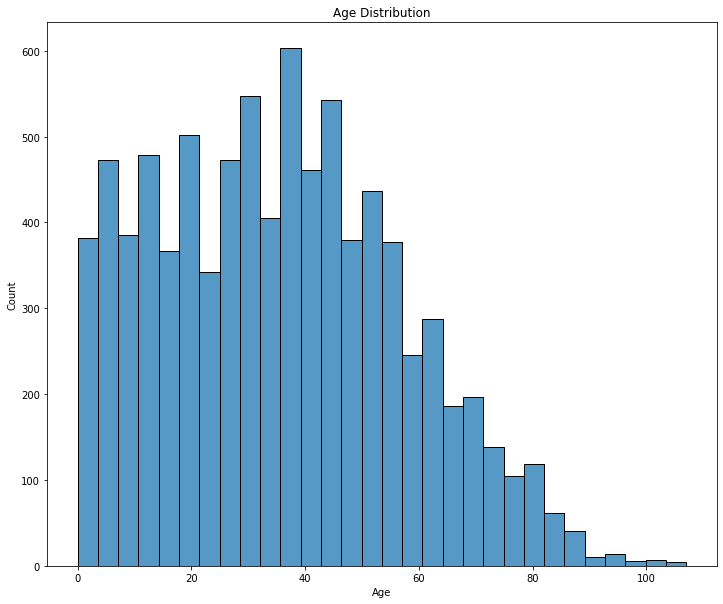

In [98]:
# Create a new figure with a larger size
plt.figure(figsize=(12, 10))

# Plot a histogram of the 'Age' variable in the 'df' DataFrame using Seaborn
sns.histplot(data=df, x='Age', bins=30)

# Add a title and axis labels to the plot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

In [99]:

# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram


Text(0.5, 1.0, 'Age Distribution')

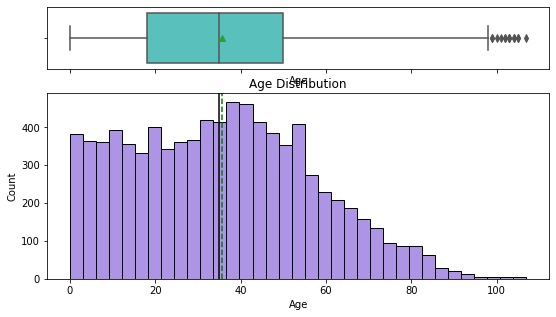

In [100]:
#Plot for the Distribution Age

histogram_boxplot(data = df, feature = 'Age')
plt.title("Age Distribution")

In [101]:
#To get the statistics describtion for the Age

df["Age"].describe()

count    8577.000000
mean       35.593098
std        21.376178
min         0.000000
25%        18.000000
50%        35.000000
75%        50.000000
max       107.000000
Name: Age, dtype: float64

--From the histogram of the Age distirbution above it can be shown that the Age is slighly right skewed and approximately normally distributed. Also confirmed the median Age to be 35.0 and few people are older in the dataset--

### Relationship to Head of House

In [102]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

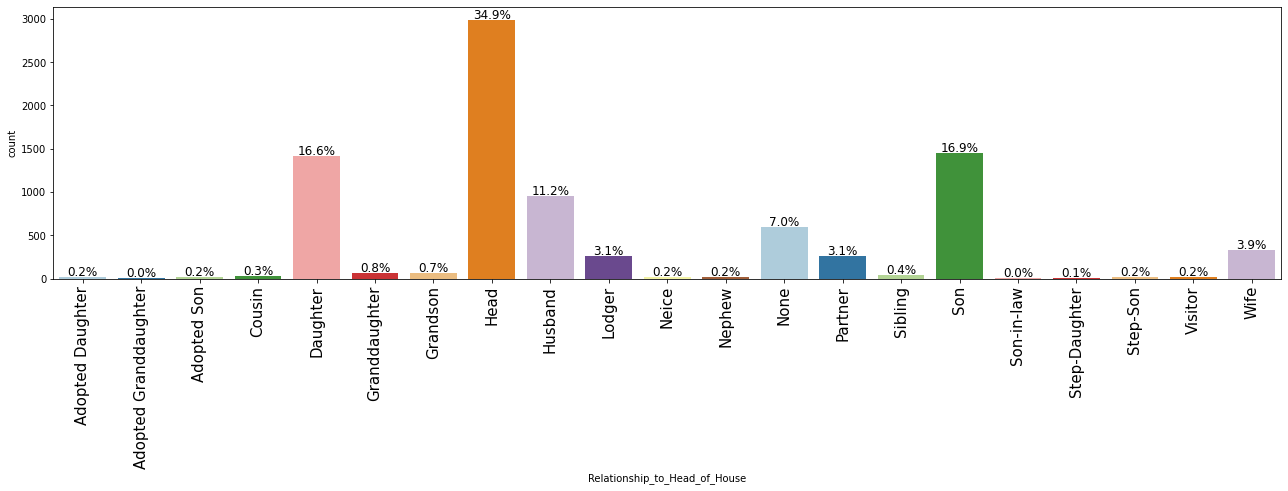

In [103]:
#Plot of Relationship to Head of House


labeled_barplot(data = df, feature = "Relationship_to_Head_of_House", perc = True)

---From the plot above
--it shows that in the dataset we have more people of about 34.9% who are head of the house
--Also we have more sons than the daughers in which the sons are 16.8% while the daughter is 16.6%
--People who have are husband are 11.2% and the wives are 3.9%
--So from the dataset the plot shows the 83.4% are either the Head of the house or daugher or Son or Husband or Wife


### Marital Status

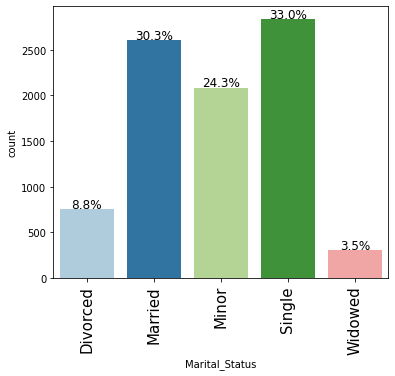

In [104]:
#Plot of Marital Status 

labeled_barplot(data = df, feature = "Marital_Status", perc = True)

---From the Marital status plot above 
---The single occupy the higer percentage of the population having 33.0%,the married having 30.03%
---The minor which are the children occupying the 24.3% of the population in the dataset
---The percentage of the widowed is low with 3.6% and the divorced rate been 8.8% on the population in the dataset

### Religion

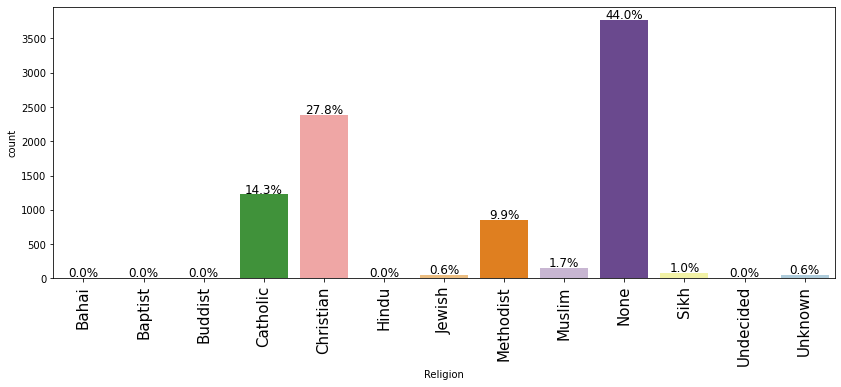

In [105]:
#Plot of Religion 

labeled_barplot(data = df, feature = "Religion", perc = True)

--From the religion plot this shows majority of the population of 44.0% does not have any religion 
--The christian has the higest percentage of 27.8%  out of the people who indicated there religion 
follow by the Catholic having 14.3% and Methodist having 9.9%


### Infirmity

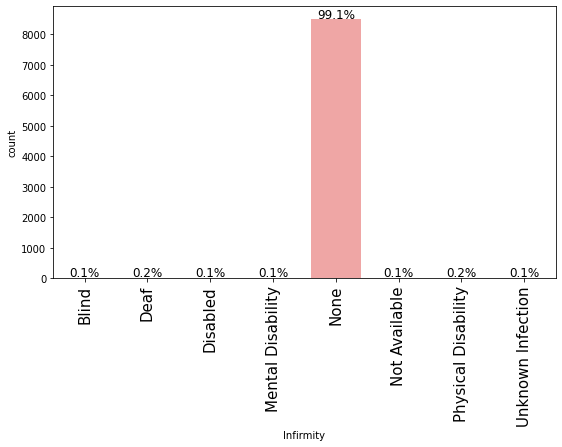

In [106]:
#Plot of Infirmity

labeled_barplot(data = df, feature = "Infirmity", perc = True)

---From the infirmity plot it shows majority of the population in the dataset of about 99.1% have no infirmity

### Bivariate Analysis
- Bivariate analysis aims to explore the association between two variables, with the goal of identifying whether there is a positive, negative, or no correlation between them.

In [107]:
df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'range_of_age'],
      dtype='object')

### Relationship between Age and Relationship to Head of House

Text(0.5, 1.0, 'Distribution of Age by Relationship to Head of House')

<Figure size 1440x1080 with 0 Axes>

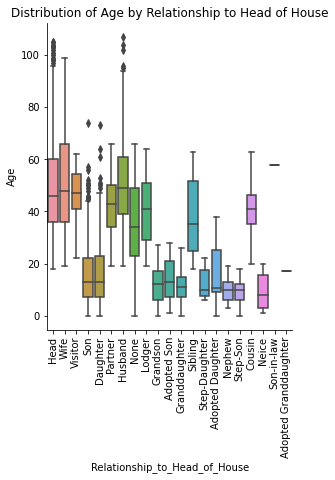

In [108]:
#Plot of Relationship between Age and Relationship to head of House

# Set figure size
plt.figure(figsize=(20, 15))

# To create a plot of Age vs. Relationship_to_Head_of_House using catplot
sns.catplot(x="Relationship_to_Head_of_House", y="Age", data=df, kind="box")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("Distribution of Age by Relationship to Head of House")

### Relationship between Age and Marital Status

Text(0.5, 1.0, 'Distribution of Age by Marital Status')

<Figure size 1440x1080 with 0 Axes>

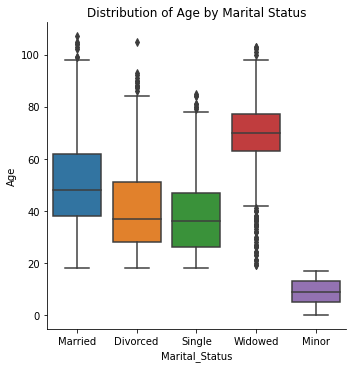

In [109]:
#Plot of Relationship between Age and Marital Status

# Set figure size
plt.figure(figsize=(20, 15))

# To create a plot of Age vs. Marital Status using catplot
sns.catplot(x="Marital_Status", y="Age", data=df, kind="box")


# Add a title to the plot
plt.title("Distribution of Age by Marital Status")

--From the plot it shows on avarage the widowed are of the older age and 

### Relationship between Age and Gender

Text(0.5, 1.0, 'Distribution of Age by Gender')

<Figure size 1440x1080 with 0 Axes>

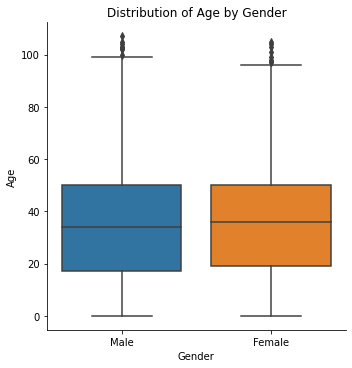

In [110]:
#Plot of Relationship between Age and Gender

# Set figure size
plt.figure(figsize=(20, 15))

# To create a plot of Age vs. Gender using catplot
sns.catplot(x="Gender", y="Age", data=df, kind="box")


# Add a title to the plot
plt.title("Distribution of Age by Gender")

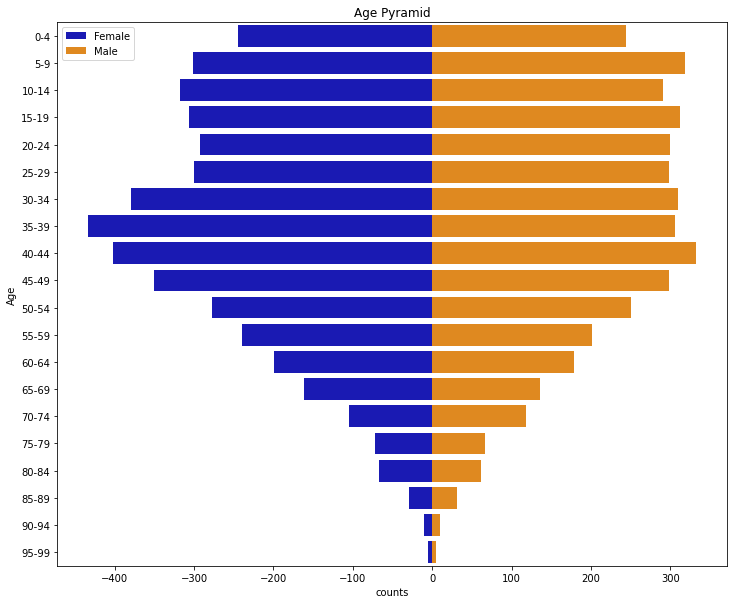

In [111]:
# create a new figure with a larger size
plt.figure(figsize=(12, 10))

# plot female data
Age_pyramid = sns.barplot(x='counts', y='Age', data=female_data, order=sorted_order, color='mediumblue', label='Female')

# plot male data
sns.barplot(x='counts', y='Age', data=male_data, order=sorted_order, color='darkorange', label='Male')

# add legend and title
Age_pyramid.legend()
plt.title('Age Pyramid')

# show the plot
plt.show()


### Relationship between Age and Religion

Text(0.5, 1.0, 'Distribution of Age by Religion')

<Figure size 1440x1080 with 0 Axes>

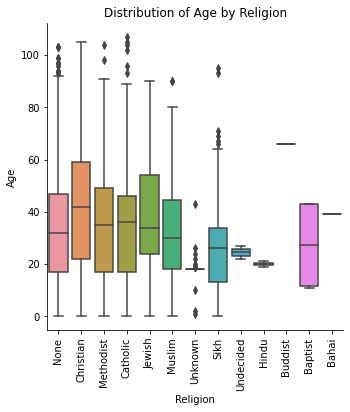

In [112]:
#Plot of Relationship between Age and Religion

# Set figure size
plt.figure(figsize=(20, 15))

# To create a plot of Age vs. Religion using catplot
sns.catplot(x="Religion", y="Age", data=df, kind="box")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("Distribution of Age by Religion")

--From the plot it shows the average age of the christian is high, the younger age are those with no religion

# Analysis and Calculations

### Divorce and Marriage Analysis

In [113]:
#To see those who are married and dirvorced in the population

married_divorced = df.loc[df['Marital_Status'].isin(["Married", "Divorced"])]

In [114]:
#Now to get the crude analysis of the divorse rate, marriage rate

crude_married_rate = len(married_divorced[married_divorced['Marital_Status'] == 'Divorced']) / len(df) * 1000

marriage_rate = len (married_divorced[married_divorced['Marital_Status'] == 'Married']) / len(df) * 1000

In [115]:
print(crude_married_rate)

print(marriage_rate)

87.79293459251485
303.36947650693713


In [116]:
#To calculate the divorce to marriage ratio

divorce_marriage = len(married_divorced[married_divorced['Marital_Status'] == 'Divorced']) / len (married_divorced[married_divorced['Marital_Status'] == 'Married'])

divorce_marriage

0.28939277478862413

### Birth and Death Rate

#for the calculation of the crude birth and death rate 
#Number of count of birth and death in the census data divide by the total polution of the census data
#Then multiply by 1000

#### Birth Rate

In [117]:
#To calculate the total population
total_population = len(df)

#To count the number of birth rate

birth = df['Age'].apply(lambda x: 1 if x < 1 else 0).sum()

#Calculate the crude birth rate

crude_birth_rate = (birth / total_population) * 1000

print(crude_birth_rate)

9.210679724845516


#### Death Rate

[15.4, 16.2, 3.0, 4.0, 2.2]


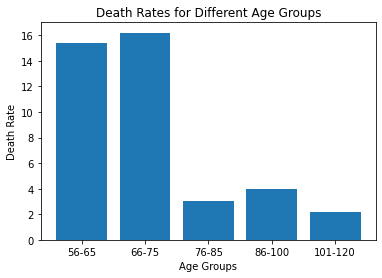

In [118]:
# calculate Death rates for each age group

death_rate = []

y = df.loc[(df["Age"] >= 56) & (df["Age"] <= 60)]

x = df.loc[(df["Age"] >= 61) & (df["Age"] <= 65)]

death_rate1 = abs(len(y) - len(x)) / 5

age_within_60_and_70 = df.loc[((df["Age"] >= 66) & (df["Age"] <= 70))]

age_within_71_and_75 = df.loc[((df["Age"] >= 71) & (df["Age"] <= 75))]

death_rate2 = abs(len(age_within_60_and_70) - len(age_within_71_and_75)) / 5

age_betwn_76_and_80 = df.loc[((df['Age'] >= 76) & (df['Age'] <= 80))]

age_btwn_81_and_85 = df.loc[((df['Age'] >= 81) & (df['Age'] <= 85))]

death_rate3 = abs(len(age_betwn_76_and_80) - len(age_btwn_81_and_85)) / 5

age_betwn_86_and_90 = df.loc[((df['Age']>=86) & (df['Age']<=90))]

age_betwn_91_and_100 = df.loc[((df['Age']>=91) & (df['Age']<=100))]

death_rate4 = abs(len(age_betwn_86_and_90) - len(age_betwn_91_and_100)) / 5

age_betwn_101_and_110 = df.loc[((df["Age"] >= 101) & (df['Age'] <= 110))]

age_betwn_111_and_120 = df.loc[((df["Age"] >= 111) & (df['Age'] <=120))]

death_rate5 = abs(len(age_betwn_101_and_110) - len(age_betwn_111_and_120)) / 5

# create a list of death rates

d_rates = [death_rate1, death_rate2, death_rate3, death_rate4, death_rate5]

print(d_rates)

# create a bar plot

plt.bar(['56-65', '66-75', '76-85', '86-100', '101-120'], d_rates)

plt.xlabel('Age Groups')

plt.ylabel('Death Rate')

plt.title('Death Rates for Different Age Groups')

plt.savefig(f'Death.png')

plt.show()


### Total Death rate

In [119]:
display(Markdown(f'Total Death Rate is'),sum(d_rates))

Total Death Rate is

40.800000000000004

### Employment and Unmployment

In [120]:
print(f"The Proportion of Unemployed is {(df['Occupation'] == 'Unemployed').sum() / df.shape[0] * 100:.2f}%")

The Proportion of Unemployed is 5.98%


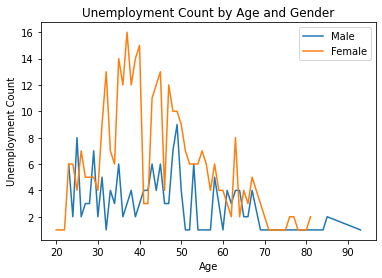

In [121]:
# create a umployed subset of the data for unemployed individuals
unemployed = df[df['Occupation'] == 'Unemployed']

# group the data by age and gender
unemployed_by_age_gender = unemployed.groupby(['Age', 'Gender']).size().reset_index(name='count')

# create and assigning for male and female unemployment counts
male_unemployed = unemployed_by_age_gender[unemployed_by_age_gender['Gender'] == 'Male']
female_unemployed = unemployed_by_age_gender[unemployed_by_age_gender['Gender'] == 'Female']

# create plot of male and female unemployment counts by age
plt.plot(male_unemployed['Age'], male_unemployed['count'], label='Male')
plt.plot(female_unemployed['Age'], female_unemployed['count'], label='Female')

# set the title and axis labels
plt.title('Unemployment Count by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Unemployment Count')

# add a legend
plt.legend()

# display the plot
plt.show()

In [122]:
other_occupation = df.Occupation.unique().tolist()
other_occupation.remove('Unemployed')

employment_data = df.Occupation.replace(other_occupation, "Employed")
employment_data = employment_data.value_counts(normalize=True)
employment_data.map('{:2%}'.format)

Employed      94.018888%
Unemployed     5.981112%
Name: Occupation, dtype: object

<AxesSubplot:ylabel='Occupation'>

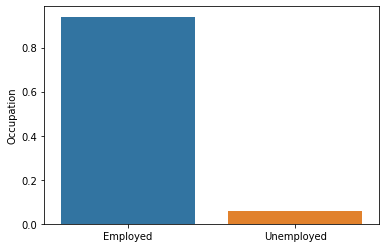

In [123]:
sns.barplot(y=employment_data, x = employment_data.index)

### Occupancy Level

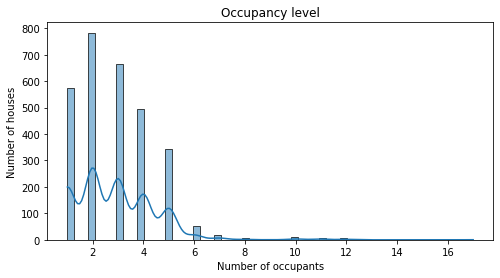

In [124]:
occupancy = df.groupby(["House_Number", "Street"])["Surname"].count()
plt.figure(figsize=(8,4))
hist = sns.histplot(x= occupancy, kde =True)
hist.set(title= "Occupancy level", xlabel = "Number of occupants", ylabel = "Number of houses")
plt.show()

### Immigration and Emmigration

In [125]:
ratio = 1000 / total_population
ratio

0.11659088259298123

In [126]:
# Filter rows in the dataframe for specific criteria using boolean indexing
unemployed_lodger = df[(df["Relationship_to_Head_of_House"] == "Lodger") & (df["Occupation"] == "Unemployed")]
lodger_age = df[(df["Relationship_to_Head_of_House"] == "Lodger") & (df["Occupation"] != "Unemployed") & (df["Age"] >= 55)]
lodger_divorced = df[(df["Relationship_to_Head_of_House"] == "Lodger") & (df["Occupation"] != "Unemployed") & (df["Marital_Status"] == "Divorced") & (df["Age"] <= 55)]
unemployed_visitor = df[(df["Relationship_to_Head_of_House"] == "Visitor") & (df["Occupation"] == "Unemployed")]
visitor_age = df[(df["Relationship_to_Head_of_House"] == "Visitor") & (df["Occupation"] != "Unemployed") & (df["Age"] >= 55)]
visitor_divorced = df[(df["Relationship_to_Head_of_House"] == "Visitor") & (df["Occupation"] != "Unemployed") & (df["Marital_Status"] == "Divorced") & (df["Age"] <= 55)]

# Compute the total number of immigrants based on the filtered rows and the magnification factor
total_immigrant = round((len(unemployed_lodger) + len(lodger_age) + len(lodger_divorced) + len(unemployed_visitor) + len(visitor_age) + len(visitor_divorced)) * ratio)
total_immigrant

14

In [127]:
# Filter rows in the dataframe for specific criteria using boolean indexing
lodger_student = df[(df["Relationship_to_Head_of_House"] == "Lodger") & (df["Occupation"].isin(["Student", "University Student", "PhD Student"]))]
lodger_cousin = df[(df["Relationship_to_Head_of_House"] == "Cousin") & (df["Occupation"].isin(["Student", "University Student", "PhD Student"]))]
visitor_student = df[(df["Relationship_to_Head_of_House"] == "Visitor") & (df["Occupation"].isin(["Student", "University Student", "PhD Student"]))]

# Compute the total number of emigrants based on the filtered rows and the magnification factor
total_emigration = round((len(lodger_student) + len(visitor_student) + len(lodger_cousin)) * ratio)
total_emigration

3

### Commuters

In [128]:
# Group the dataset by 'Occupation' column
occupation_group = df.groupby('Occupation')

# Get the count of 'University Student' in the 'Occupation' group
university_student_count = occupation_group.get_group('University Student')['First_Name'].count()
phd_student_count = occupation_group.get_group('PhD Student')['First_Name'].count()
print(f"Number of University Students: {university_student_count}")
print(f"Number of phd Students: {phd_student_count}")

Number of University Students: 514
Number of phd Students: 16
